## Tensorflow Neural Networks (Part # 02):

Let's code along some more realistic Tensorflow __Regression__ example, and we'll also introduce Tensorflow's __tf.estimate__ API, which is a much simpler API for models like __Regression__ and __Classification__.

We already have a lot of Machine Learning algorithms that can perform __Regression__ and __Classification__ tasks very well. But, the purpose of Tensorflow really is to try to solve problems that typical Machine Learning algorithms can't solve e.g __image classification__.

Later on, we'll see how to use Tensorflow for things like __word embeddings__ or even using __Recurrent Neural Networks__ for time-series analysis. Those are the problems that are really hard to solve without the use of __Deep Neural Network__ or __Specialized Neural Networks__ using Tensorflow.

Simple example like typical __Regression__ and __Classfication__ tasks are pretty easy to solve, well! depending on our dataset with other Machine Learning algorithms, and because Tensorflow has a nice __estimator API__ that's going to make our lives a lot easier, if we decide to use Tensorflow for some of these more basic supervised learning problems.

So, Let's to ahead and see how we can perform more realistic __Regression__ tasks with Tensorflow..

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [7]:
# Creating data set with noise added! 

x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

print(x_data)
print('\n')
print(noise)

[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01]


[ 0.77765904  1.10941652  1.74752348 ... -3.02610013  1.19451055
  0.36093572]


#### Equation:

y = mx + b

b = 5

In [11]:
# Original 'y', later on we'll figure out using Neural Network whick is '0.5' for now
# And to make it a little harder for our model, we'll add some noise in it

y_true = (0.5 * x_data) + 5 + noise

In [13]:
# Creating data frame off of our generated data

x_df = pd.DataFrame(data = x_data, columns = ['X Data'])
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [14]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [15]:
y_df.head()

,Y
0,5.777659
1,6.109422
2,6.747533
3,5.202699
4,4.282498


In [16]:
# Final data frame

final_data = pd.concat([x_df, y_df], axis = 1)

In [19]:
final_data.head()

,X Data,Y
0,0.00000,5.777659
1,0.00001,6.109422
2,0.00002,6.747533
3,0.00003,5.202699
4,0.00004,4.282498


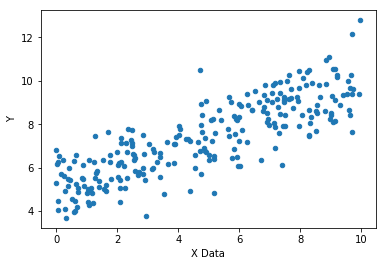

In [31]:
# Grabbing the random samples of our data
# We can plot n_samples of our choice easily rather than whole data set

final_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

## Regression with Tensorflow:

Now let's go ahead and create a linear fit on above dataset using Tensorflow. Keep in mind a _million_ points is a huge dataset to pass in at once. And a lot of times, when we are dealing with _Deep learning_, we have a humongous dataset, cuz the more data we have, the better usually for training a lot of these complex models.

But, we can't just feed in a _million_ data observations into a __Neural Network__ at once. What we do instead we create __batches__ of data. We feed in thes __batches__ of the data for training batch by batch.

Let's go ahead and see how we do that!

In [39]:
np.random.randn(2)

array([0.954893  , 1.10986439])

In [42]:
batch_size = 8

# randomly initilize the weights (slope) and biases(intercept)

m = tf.Variable(0.95)
b = tf.Variable(1.10)

In [46]:
# Creating Placeholders

x_placeholder = tf.placeholder(tf.float32, [batch_size])
y_placeholder = tf.placeholder(tf.float32, [batch_size])

In [47]:
# Defining Graphs (Actual Operations)

y_model = (m * x_placeholder) + b

In [48]:
# Defining Error (Cost Function)

error = tf.reduce_sum(tf.square(y_placeholder - y_model))